# Homework Three
## BME 599: Advanced Topics in MRI
## Brandon Hardy

In [1]:
# Make relevant imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

# Problem One: Partial Fourier Imaging
## a. Zero-Filled Reconstruction

In [2]:
# load in data files via h5py since mat files are version 7.3
with h5py.File('Data_Assignment3_Problem1.mat', mode = 'r') as f:

    scan = np.asarray(f['kspaceData_SingleCoil']).T

    # need to convert from matlab format to numpy-compatible format
    scan = scan['real']+scan['imag']*1j

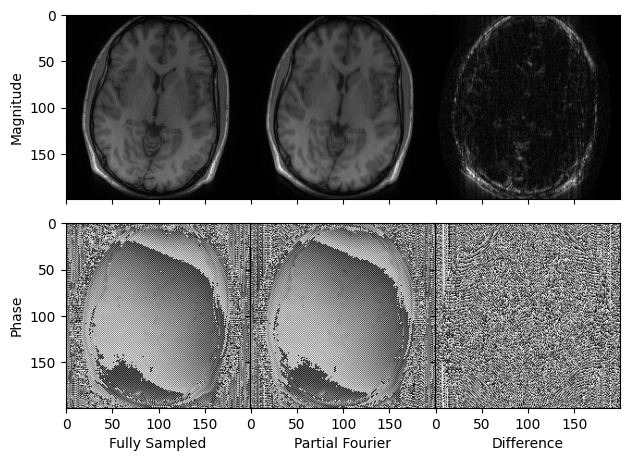

In [3]:
scan_partial_recon = np.zeros(scan.shape, dtype=np.complex128)                      # making sure to create complex-valued array so imaginary part of k-space isn't discarded
scan_partial_recon[:int(scan.shape[0]*5/8), :] = scan[:int(scan.shape[0]*5/8), :]

full_recon = fft.ifftshift(fft.ifft2(scan))
partial_recon = fft.ifftshift(fft.ifft2(scan_partial_recon))

# Plotting
fig_1a = plt.figure()
gs_1a = fig_1a.add_gridspec(2, 3, hspace=0, wspace=0)
axes_1a = gs_1a.subplots(sharex=True, sharey=True)

# fully-sampled magnitude image
axes_1a[0,0].imshow(np.abs(full_recon), cmap='gray')
axes_1a[0,0].set_ylabel('Magnitude')

axes_1a[1,0].imshow(np.angle(full_recon), cmap='gray')
axes_1a[1,0].set_xlabel('Fully Sampled')
axes_1a[1,0].set_ylabel('Phase')

# partial fourier
axes_1a[0,1].imshow(np.abs(partial_recon), cmap='gray')

axes_1a[1,1].imshow(np.angle(partial_recon), cmap='gray')
axes_1a[1,1].set_xlabel('Partial Fourier')

# difference images -- matplotlib applies windowing automatically
axes_1a[0,2].imshow(np.abs(full_recon-partial_recon), cmap='gray')

axes_1a[1,2].imshow(np.angle(full_recon-partial_recon), cmap='gray')
axes_1a[1,2].set_xlabel('Difference')

fig_1a.tight_layout()
plt.show()

## b. Conjugate Phase Reconstruction

In [4]:
# POCS



# Problem 2: SENSE
## a. Fully-Sampled Image

In [5]:
# Load data
with h5py.File('Data_Assignment3_Problem2.mat', mode = 'r') as f:
    coil_maps = np.asarray(f['coilmaps']).T
    kspace = np.asarray(f['kspaceData']).T

    coil_maps = coil_maps['real']+coil_maps['imag']*1j
    kspace = kspace['real']+kspace['imag']*1j

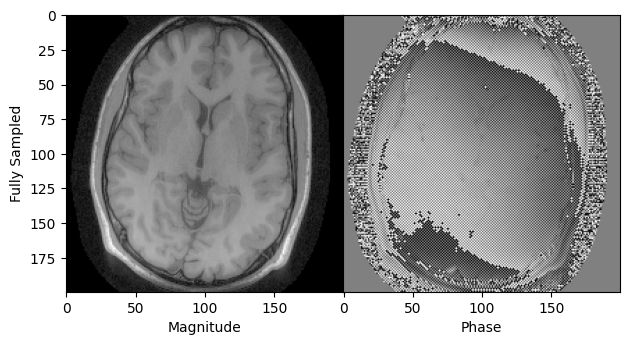

In [6]:
# reconstruct image
kspace_full_recon = fft.ifftshift(fft.ifft2(kspace, axes=(0,1)), axes=(0,1)) # iFFT, making sure to only apply transormation to kspace axes
image_full_recon = np.sqrt(np.sum(kspace_full_recon*np.conj(coil_maps), axis=-1))

# Plotting
fig_2a = plt.figure()
gs_2a = fig_2a.add_gridspec(1, 2, hspace=0, wspace=0)
axes_2a = gs_2a.subplots(sharex=True, sharey=True)

# fully-sampled magnitude image
axes_2a[0].imshow(np.abs(image_full_recon), cmap='gray')
axes_2a[0].set_xlabel('Magnitude')
axes_2a[0].set_ylabel('Fully Sampled')

axes_2a[1].imshow(np.angle(image_full_recon), cmap='gray')
axes_2a[1].set_xlabel('Phase')
fig_2a.tight_layout()
plt.show()

## b. Aliased R=2 Image

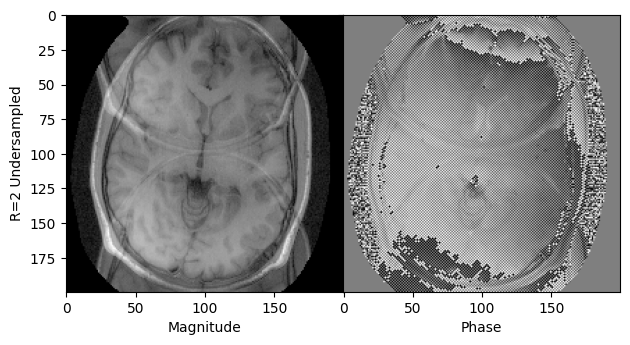

In [7]:
kspace_undersampled_2 = np.zeros(kspace.shape, dtype=np.complex128)
kspace_undersampled_2[::2,:,:] = kspace[::2,:,:]

# reconstruct image
kspace_half_recon = fft.ifftshift(fft.ifft2(kspace_undersampled_2, axes=(0,1)), axes=(0,1)) # iFFT, making sure to only apply transormation to kspace axes
image_half_recon = np.sqrt(np.sum(kspace_half_recon*np.conj(coil_maps), axis=-1))

# Plotting
fig_2b = plt.figure()
gs_2b = fig_2b.add_gridspec(1, 2, hspace=0, wspace=0)
axes_2b = gs_2b.subplots(sharex=True, sharey=True)

# fully-sampled magnitude image
axes_2b[0].imshow(np.abs(image_half_recon), cmap='gray')
axes_2b[0].set_xlabel('Magnitude')
axes_2b[0].set_ylabel('R=2 Undersampled')

axes_2b[1].imshow(np.angle(image_half_recon), cmap='gray')
axes_2b[1].set_xlabel('Phase')
fig_2b.tight_layout()
plt.show()

## c. SENSE R=2 Reconstruction

In [28]:
# start by solving in nested loops, see if I can vectorize later...
ny, nx, nc = kspace_undersampled_2.shape
n_offset = ny//2
image_sense_2 = np.zeros(kspace.shape[:-1], dtype=np.complex128)

for i in range(n_offset):
    for j in range(nx):
        
        I = kspace_undersampled_2[i,j,:]

        #print(i, ny-i)
        C1 = coil_maps[i,j,:]
        C1 = C1[:, np.newaxis]
        
        C2 = coil_maps[ny-i-1,j,:]
        C2 = C2[:, np.newaxis]

        C = np.concatenate([C1, C2], axis=1)
        print(C.shape)

        #print(np.array([i::n_offset]))
        print(I.shape)
        rho = np.linalg.pinv(C) @ I

        image_sense_2[i::n_offset,j] = rho

        

(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 2)
(8,)
(8, 

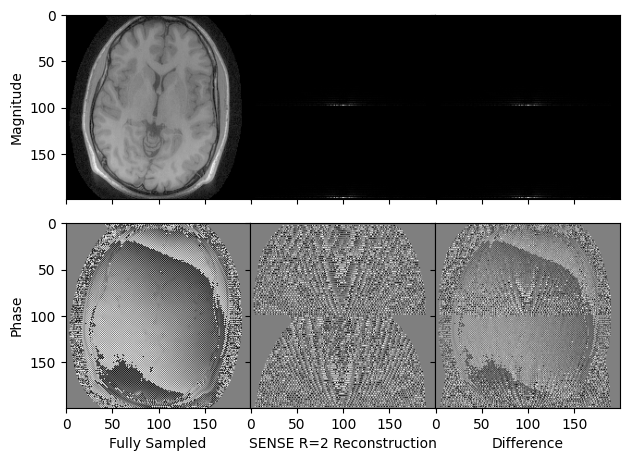

In [29]:
# Plotting
fig_2c = plt.figure()
gs_2c = fig_2c.add_gridspec(2, 3, hspace=0, wspace=0)
axes_2c = gs_2c.subplots(sharex=True, sharey=True)

# undersampled R=2 magnitude image
axes_2c[0,0].imshow(np.abs(image_full_recon), cmap='gray')
axes_2c[0,0].set_ylabel('Magnitude')

axes_2c[1,0].imshow(np.angle(image_full_recon), cmap='gray')
axes_2c[1,0].set_xlabel('Fully Sampled')
axes_2c[1,0].set_ylabel('Phase')

# SENSE R=2
axes_2c[0,1].imshow(np.abs(image_sense_2), cmap='gray')

axes_2c[1,1].imshow(np.angle(image_sense_2), cmap='gray')
axes_2c[1,1].set_xlabel('SENSE R=2 Reconstruction')

# difference images -- matplotlib applies windowing automatically
axes_2c[0,2].imshow(np.abs(image_full_recon-image_sense_2), cmap='gray')

axes_2c[1,2].imshow(np.angle(image_full_recon-image_sense_2), cmap='gray')
axes_2c[1,2].set_xlabel('Difference')

fig_2c.tight_layout()
plt.show()

## d. SENSE R=4 Reconstruction

In [10]:
kspace_undersampled_4 = np.zeros(kspace.shape, dtype=np.complex128)
kspace_undersampled_4[::4,:,:] = kspace[::4,:,:]

# reconstruct image
kspace_quarter_recon = fft.ifftshift(fft.ifft2(kspace_undersampled_4, axes=(0,1)), axes=(0,1)) # iFFT, making sure to only apply transormation to kspace axes
image_quarter_recon = np.sqrt(np.sum(kspace_quarter_recon*np.conj(coil_maps), axis=-1))


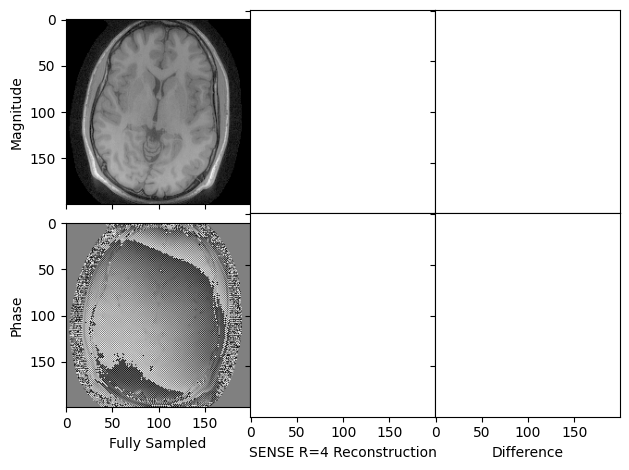

In [11]:

# Plotting
fig_2d = plt.figure()
gs_2d = fig_2d.add_gridspec(2, 3, hspace=0, wspace=0)
axes_2d = gs_2d.subplots(sharex=True, sharey=True)

# undersampled R=4 magnitude image
axes_2d[0,0].imshow(np.abs(image_full_recon), cmap='gray')
axes_2d[0,0].set_ylabel('Magnitude')

axes_2d[1,0].imshow(np.angle(image_full_recon), cmap='gray')
axes_2d[1,0].set_xlabel('Fully Sampled')
axes_2d[1,0].set_ylabel('Phase')

# SENSE R=4
#axes_2d[0,1].imshow(np.abs(partial_recon), cmap='gray')

#axes_2d[1,1].imshow(np.angle(partial_recon), cmap='gray')
axes_2d[1,1].set_xlabel('SENSE R=4 Reconstruction')

# difference images -- matplotlib applies windowing automatically
#axes_2d[0,2].imshow(np.abs(full_recon-partial_recon), cmap='gray')
#
#axes_2d[1,2].imshow(np.angle(full_recon-partial_recon), cmap='gray')
axes_2d[1,2].set_xlabel('Difference')

fig_2d.tight_layout()
plt.show()